## Title :
Exercise: CS109A Olympics

## Description :

![fig1](fig/fig1.png)

## Data Description:

## Instructions:

- In this exercise, you will simulate the 100m sprint race discussed during the lecture.
- We have already defined for you a Sprinter() class which has two characteristics for each sprinter:
    - Base time 
    - Performance variance 
- Run the code cell that makes four instances of the `Sprinter()` class. You will work with those for the entire exercise.
- Call the time attribute of the helper class to get the time taken by a competitor in the actual race.
- First run the race simulation five times; you will do this by creating a dictionary with participant name as keys, and time taken in a simulated race as the values. You will sort this dictionary by values and determine the winner of the simulated race.
- Repeat the simulation of the race for 10,000 times and count who won the race for how many times. Based on this observation, you will then investigate why a particular participant won as many times?
- Repeat the simulation for 10,000 times, but this time get the distribution of times for each participant over these runs. 
- Calculate the mean race time, standard deviation of the race time and the confidence interval for each participant.
- Use the helper code to observe a plot similar to the one given below:
    
![fig2](fig/fig2.png)

## Hints: 

<a href="https://realpython.com/python-counter/" target="_blank">Counter()</a>
Helps accumulating counts of objects in a certain data structure.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html" target="_blank">np.mean()</a>
Used to calculate the mean of an array.

<a href="https://www.w3schools.com/python/ref_func_sorted.asp" target="_blank">sorted()</a>
Used to sort data.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html" target="_blank">np.std()</a>
Used to calculate the std deviation of an array.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.percentile.html" target="_blank">np.percentile</a>
Used to calculate percentile of data inbetween a given range. Frequently used for calculating confidence intervals.

## CS109A Olympics : 100m dash
We are going to have 4 of our team members compete against each other in the 100m dash.

In [1]:
# Importing libraries
import numpy as np
from time import sleep
import os
from IPython.display import clear_output
from collections import Counter
from helper import Sprinter
from helper import run_sim
import matplotlib.pyplot as plt
from prettytable import PrettyTable


## Taking a look at the competitors
Each participant has a characteristic assigned to them. The characteristic has 2 parts :

1. Base speed : This is the time they gave in a non-competitive environment.
2. Performance variance : Based on the mood, weather and other conditions this measure determines how much a participant's time will vary.

In [2]:
# Name of sprinters
sprinters = ['Pavlos','Tale','Varshini','Hayden']

# Defining charactersistics, ('Base pace','performance variance')
characteristics = [(13,0.25),(12.5,0.5),(12.25,1),(14.5,1)]
sprinters_dict = {}

for idx,sprinter in enumerate(sprinters):

    # Take note of the * before characteristics
    sprinters_dict[sprinter] = Sprinter(*characteristics[idx])


## Running a race
`sprinters_dict` has keys as the name of each participant, and the value as a class. The `time` attribute of the class is the time taken by that person to run a race. 
- Call `sprinters_dict['Pavlos'].time` for 10 different times.

In [3]:
# Call time attribute
for _ in range(10):
    print(sprinters_dict['Pavlos'].time)


12.932683322654645
13.023173395593401
13.126340444410046
12.809644766708097
12.762211220827293
13.2127611755847
13.259431892027587
12.79450071677527
12.956675007309483
12.917210829831408


## ⏸ Pause & Think
Run the cell above, once again. What do you observe?

A. Output is different because the python compile memory location has changed

B. Output is the same

C. Output changes because it is a new sample from random process

In [4]:
### edTest(test_chow0) ###
# Submit an answer choice as a string below (eg. if you choose option A put 'A')
answer = 'C'


- Get the times for each participant by calling the `time` attribute and create a dictionary called `race`, which has the key as the name of the participant and value as the time taken by participant to run the race.
- Sort `race.items()` according to time and get the item in dictionary with the least time taken to finish and assign it to `winner`. 

In [5]:
### edTest(test_race) ###
# Get the times for each participant and make a dictionary
race = {name: sprinter.time for name, sprinter in sprinters_dict.items()}

# Sort the items of the dictionary to get the winner
# Hint: Remember to sort by the values and not the keys
winner = sorted(race.items(), key=lambda item: item[1])[0]


## Race simulation

As you would have noticed, every time you make a new dictionary `race`, the results would differ.

Redefine the `race` dictionary, and run the cell below for a simulation of the race! 

In [6]:
# Get the times for each participant and make a dictionary
race = {sprinter:dash.time for sprinter,dash in sprinters_dict.items()}

# Sort the items of the dictionary to get the winner
winner = sorted(race.items(),key=lambda x:x[1])[0]

# Uncomment and execute the following code
run_sim(race,winner)


|START|----------------------------------------|Pavlos
|START|----------------------------------------|Tale
|START|----------------------------------------|Varshini
|START|------------------------------------    |Hayden

The winner is Varshini with a time of 12.18s!


## Multiple simulations
Earlier was just one race, we want to find out who performs better over multiple races. So let's run the race 5 times

- Run a loop for 5 times
- In each loop generate the race dictionary as done earlier, and get the winner after sorting `race.items()`
- Append name of the winners to the `winner_list`

Keep track of everyone's timings

In [7]:
# Run the simulation and append winners to the winner_list
# Create an empty list
winner_list = []

# Run a simulation for 5 loops
for simulation in range(5):

    # Create a race dictionary
    race = {k:v.time for k,v in sprinters_dict.items()}

    # Sort the items
    winner = sorted(race.items(),key=lambda x:x[1])[0]

    # Append the name of the winner to winners_list
    winner_list.append(winner)
    
# Take a look at the winners list
winner_list  


[('Varshini', 12.14945631571394),
 ('Tale', 12.48135730920212),
 ('Varshini', 12.821736825777664),
 ('Tale', 12.036856019495298),
 ('Varshini', 11.999264087937663)]

### Even more simulations

We will run 10,000 simulations and use the `Counter` to see who wins how many times.

Check the hints for how to use `Counter()`.

In [8]:
# Run the simulation and append winners to the winner_list
# Create an empty list
winner_list = []

# Run a simulation for 10000 loops
for simulation in range(10000):

    # Create race dictionary
    race = {k:v.time for k,v in sprinters_dict.items()}

    # Sort the items
    winner = sorted(race.items(),key=lambda x:x[1])[0]

    # Append the name of the winner to winners_list
    winner_list.append(winner[0])
    
# Display first 5 entries from winner_list
winner_list[:5] 


['Varshini', 'Tale', 'Varshini', 'Varshini', 'Varshini']

In [9]:
### edTest(test_wins) ###
# Get the counts for each person winning the race
# Hint: Use counter, look at the hints 
wins = Counter(winner_list)

# Print wins to see the output of the simulation
print(wins)


Counter({'Varshini': 5754, 'Tale': 3616, 'Pavlos': 504, 'Hayden': 126})


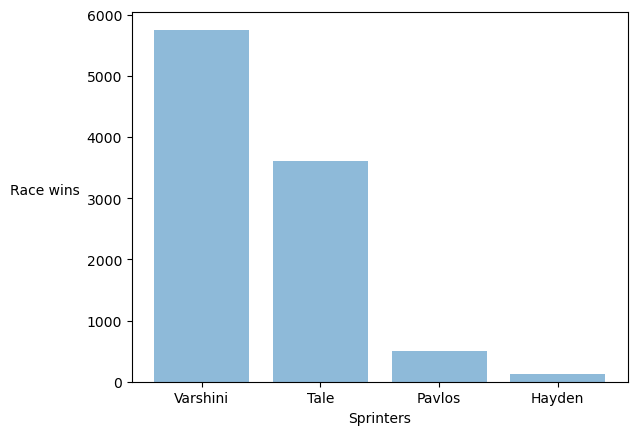

In [10]:
# Helper code to plot the wins of each sprinter
plt.bar(list(wins.keys()),list(wins.values()),alpha=0.5)
plt.xlabel('Sprinters')
plt.ylabel('Race wins',rotation=0,labelpad=30)
plt.show();


## Why is Varshini winning so much ?

Let us analyze why exactly is Varshini winning so frequently in our simulations.
But first, we will need to record the sprint timings for each sprinter in every simulation.

We will again run 10,000 simulations but this time record the individual sprint timings for each simulation instead.

- Make a new dictionary `race_results` with keys as the name of sprinters and the value as an empty list. We will append race results to this list after each simulation.
- Run a simulation loop for 10000 times
- In each simulation loop over `sprinters_dict.items()` and for each participant:
    - Calculate time by calling `.time` 
    - `append` time to the list for particular key of `race_results`

In [11]:
# Run the earlier simulation loop for 10000 times
# Loop over the sprinters_dict items and for each participant
# Call time and append to the corresponding list in race_results

race_results= {k:[] for k in sprinters_dict.keys()}
for simulation in range(10000):
    for sprinter,dash in sprinters_dict.items():

        # For a given participant call the .time attribute
        sprint_timing = dash.time
        race_results[sprinter].append(sprint_timing) 


### Sample mean $\bar{x}$ sample standard deviation $s$


Now we have a list of times given by each participant. We have the complete distribution, so let's calculate the mean, standard deviation and confidence interval.

As discussed in the lecture, if we have a given sample, we can quickly compute the mean and standard deviation using `np.mean()` and `np.std()`.

Let's begin with the race results for `Pavlos`.

In [12]:
# Using the race_results dictionary, find the mean
# and std for 'Pavlos'
pavlos_mean = np.mean(race_results["Pavlos"])
pavlos_std = np.std(race_results["Pavlos"])
print(f'The average pace of Pavlos is {pavlos_mean:.2f} and the sample std is {pavlos_std:2f}')


The average pace of Pavlos is 13.00 and the sample std is 0.252648


### Sample mean $\bar{x}$ sample standard deviation $s$ for all sprinters

For each sprinter in the `race_results` dicitionary, find the mean and standard deviation of the 10,000 simulations using the `np.mean()` and `np.std()` functions.

Store your findings in a new dictionary called `race_stats`.

In [13]:
# Calculate mean and std of each participant

# Initialize an empty dictionary
race_stats = {}

# Loop over race_results.keys()
for sprinter in race_results.keys():
    sprinter_mean = np.mean(race_results[sprinter])
    sprinter_std = np.std(race_results[sprinter])

    # Store it as a list [mean,std] corresponding to each 
    # participant key in race_stats
    race_stats[sprinter] = [sprinter_mean,sprinter_std]


In [14]:
# Use the helper code below to print your findings
pt = PrettyTable()

pt.field_names = ["Sprinter", "Sample mean", "Sample std"]

for sprinter,stats in race_stats.items():
    pt.add_row([sprinter, round(stats[0],3),round(stats[1],3)])

print(pt)

+----------+-------------+------------+
| Sprinter | Sample mean | Sample std |
+----------+-------------+------------+
|  Pavlos  |    13.003   |   0.253    |
|   Tale   |     12.5    |   0.501    |
| Varshini |    12.25    |   1.004    |
|  Hayden  |    14.505   |   0.994    |
+----------+-------------+------------+


### Confidence Interval
Confidence interval is the range of values for which we can claim a certain confidence level(95% mostly). The confidence interval represents values for the population parameter for which the difference between the parameter and the observed estimate is not significant at the 5% level.

- Calculate the 95% CI by getting `np.percentile` at 2.5 and 97.5.
- Calculate and append these to the list of stats in the `race_stats` dictionary, for each participant

In [20]:
#By using the race_results dictionary defined above,
# Find the 2.5 and 97.5 percentile of Tale's race runs.
# Hint : Use race_results['Tale's']
CI = np.percentile(race_results["Tale"],[2.5,97.5])
print(f'The 95% confidence interval for Tale is {round(CI[0],2),round(CI[1],2)}')

The 95% confidence interval for Tale is (11.53, 13.5)


### Confidence intervals for all sprinters.

Let's repeat the above for each sprinter.
You will add this information to your `race_stats` dictionary.

We expect you to extend stats list with the $2.5$ and the $97.5$ percentile values for each sprinter.

For e.g., if for `Pavlos`, we have `mean=13.00`, `std=0.1`, and CI as `(12.8,13.2)`, your `race_stats['Pavlos']` must look like: `[13.00,0.1,12.8,13.2]`.

In [21]:
# Repeat the same as above, but for every sprinter
# run through the race_results dictionary for each sprinter
# find the confidence interval, and add it to the race_stats dictionary 
# defined above

for sprinter,runs in race_results.items():
    ci = np.percentile(runs,[2.5,97.5])

    # Hint: You can use the .extend() method to add it to the 
    # existing list of stats
    race_stats[sprinter].extend(ci)


In [22]:
# Use the helper code below to print your findings
pt = PrettyTable()

pt.field_names = ["Sprinter", "Sample mean", "Sample std","95% CI"]

for sprinter,stats in race_stats.items():
    mean = round(stats[0],3)
    std = round(stats[1],3)
    confidence_interval = (round(stats[2],3),round(stats[3],3))
    pt.add_row([sprinter, mean,std,confidence_interval])

print(pt)


+----------+-------------+------------+------------------+
| Sprinter | Sample mean | Sample std |      95% CI      |
+----------+-------------+------------+------------------+
|  Pavlos  |    13.003   |   0.253    | (12.513, 13.496) |
|   Tale   |     12.5    |   0.501    |  (11.528, 13.5)  |
| Varshini |    12.25    |   1.004    | (10.301, 14.202) |
|  Hayden  |    14.505   |   0.994    | (12.579, 16.435) |
+----------+-------------+------------+------------------+


## Histogram plot for each sprinter

Run the following cell to get a cool plot for distribution of times.

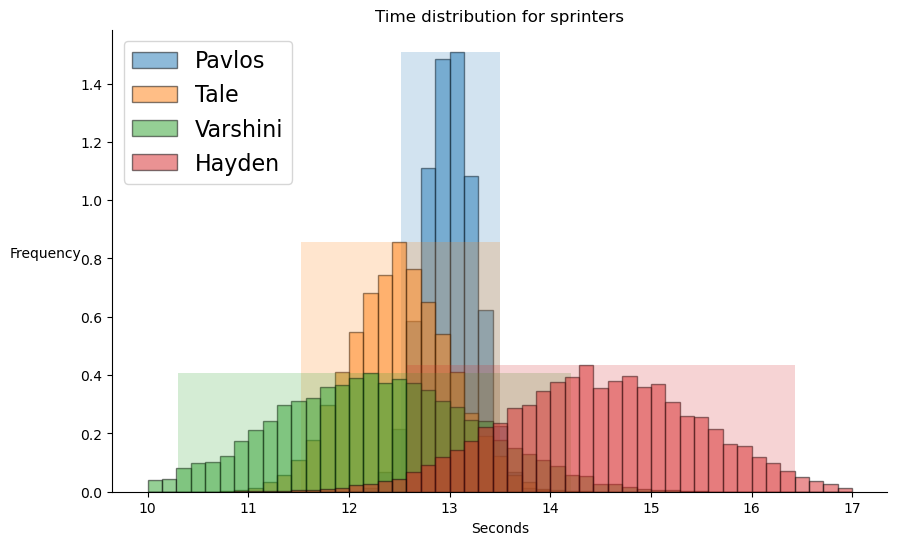

In [23]:
# Helper code to plot the distribution of times
fig = plt.gcf()
fig.set_size_inches(10,6)
bins = np.linspace(10, 17, 50)

for sprinter,runs in race_results.items():
    height, bins, patches = plt.hist(runs, bins, alpha=0.5, \
                            label=sprinter,density=True,edgecolor='k')
    plt.fill_betweenx([0, height.max()], race_stats[sprinter][2], race_stats[sprinter][3], alpha=0.2)
plt.legend(loc='upper left',fontsize=16)
plt.xlabel('Seconds')
plt.ylabel('Frequency',rotation=0,labelpad=25)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Time distribution for sprinters')
plt.show()


## ⏸ Pause & Think

Take a look at the histograms for each participant and comment on why do you think is Varshini winning more races?

In [24]:
### edTest(test_chow1) ###
# Write your answer as a string below
answer = 'Has the lowest mean'


## ⏸ What **one parameter** should Tale change in order to win more races?

**Note : Pick one that is most influential**

A. Improve consistency

B. Reduce base time

C. Increase base time

D. Relax and hydrate before the race

In [ ]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A put 'A')
answer = '___'


In [ ]:
# Before you click mark, please comment out the run_sim function above


## 👩🏻‍🎓 Bonus (Not graded)

Find out who among has would have the most podium finishes (top 3).

In [32]:
# Your code here
from collections import Counter

# Number of simulations
num_races = len(next(iter(race_results.values())))
sprinter_names = list(race_results.keys())

# Counter to keep track of podium finishes
podium_counts = Counter()

# For each race
for i in range(num_races):
    # Create a list of (sprinter, time) tuples for the i-th race
    results = [(name, race_results[name][i]) for name in sprinter_names]
    # Sort by time (lower is better)
    top_3 = sorted(results, key=lambda x: x[1])[:3]
    # Update the podium counts
    podium_counts.update([name for name, _ in top_3])

# Print who had the most podiums
most_podiums = podium_counts.most_common(1)[0]
print(f'{most_podiums[0]} has the most podium finishes with {most_podiums[1]} podiums.')

# Optional: print full ranking
print("Podium Rankings:")
for name, count in podium_counts.most_common():
    print(f"{name}: {count}")


Tale has the most podium finishes with 9848 podiums.
Podium Rankings:
Tale: 9848
Varshini: 9567
Pavlos: 9522
Hayden: 1063
